## DATA UNDERSTANDING

### Description of columns in the file:

[age] is an integer from 0 to 116, indicating the age

[gender] is either 0 (male) or 1 (female)

[race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

[date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [1]:
#importing libraries
import os # to access files in the opereating system
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
#Accessing all image file names to get ages
utkface_path = ('data/UTKFace')
utkface_image_names = os.listdir(utkface_path)
utkface_image_names

['100_0_0_20170112213500903.jpg.chip.jpg',
 '100_0_0_20170112215240346.jpg.chip.jpg',
 '100_1_0_20170110183726390.jpg.chip.jpg',
 '100_1_0_20170112213001988.jpg.chip.jpg',
 '100_1_0_20170112213303693.jpg.chip.jpg',
 '100_1_0_20170112215032192.jpg.chip.jpg',
 '100_1_0_20170117195420803.jpg.chip.jpg',
 '100_1_0_20170119212053665.jpg.chip.jpg',
 '100_1_2_20170105174847679.jpg.chip.jpg',
 '100_1_2_20170112213615815.jpg.chip.jpg',
 '100_1_2_20170112222336458.jpg.chip.jpg',
 '101_0_0_20170112213500903.jpg.chip.jpg',
 '101_1_2_20170105174739309.jpg.chip.jpg',
 '103_0_2_20170112213001988.jpg.chip.jpg',
 '105_0_0_20170112213001988.jpg.chip.jpg',
 '105_1_0_20170112213001988.jpg.chip.jpg',
 '105_1_0_20170112213021902.jpg.chip.jpg',
 '105_1_0_20170112213507183.jpg.chip.jpg',
 '105_1_1_20170112213303693.jpg.chip.jpg',
 '10_0_0_20161220222308131.jpg.chip.jpg',
 '10_0_0_20170103200329407.jpg.chip.jpg',
 '10_0_0_20170103200522151.jpg.chip.jpg',
 '10_0_0_20170103233459275.jpg.chip.jpg',
 '10_0_0_201701

In [3]:
# function to generate the labels from the image file names according to the format given above.

def age_gender_race_split(image_name):
    
    """ This function generates labels from the image file names"""

    image_labels = image_name.split('_')
    age = image_labels[0]
    gender = image_labels[1]
    race = image_labels[2]
    timestamp=image_labels[-1]
    

    return (age, gender, race, timestamp)
     

In [4]:
#using for loops to store labels in relevant arrays relevant 
age_labels = np.array([])
gender_labels = np.array([])
race_labels = np.array([])
timestamp_labels=np.array([])

for image in utkface_image_names:
    age, gender, race,timestamp = age_gender_race_split(image)
    age_labels = np.append(age_labels, age)
    gender_labels = np.append(gender_labels, gender)
    race_labels = np.append(race_labels, race)
    timestamp_labels=np.append(timestamp_labels, timestamp)

In [5]:
age = pd.Series(age_labels, name = 'Ages')
gender = pd.Series(gender_labels, name = 'Genders')
race = pd.Series(race_labels, name="Races")
timestamp=pd.Series(timestamp_labels, name="Timestamp")
df = pd.concat([age, race, gender, timestamp], axis=1)
df.head()

Ages Races Genders                       Timestamp
0  100     0       0  20170112213500903.jpg.chip.jpg
1  100     0       0  20170112215240346.jpg.chip.jpg
2  100     0       1  20170110183726390.jpg.chip.jpg
3  100     0       1  20170112213001988.jpg.chip.jpg
4  100     0       1  20170112213303693.jpg.chip.jpg

In [6]:
#getting value counts for Age column
age_counts=df['Ages'].value_counts()
age_counts

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
91        2
101       2
103       1
111       1
Name: Ages, Length: 104, dtype: int64

In [7]:
#getting value counts for Race
race_counts=df['Races'].value_counts()
race_counts

0                                 10078
1                                  4526
3                                  3975
2                                  3434
4                                  1692
20170116174525125.jpg.chip.jpg        1
20170109142408075.jpg.chip.jpg        1
20170109150557335.jpg.chip.jpg        1
Name: Races, dtype: int64

We have noticed there are 3 rows that do not follow naming convention. We will handle this in Data preparation

In [8]:
gender_counts= df['Genders'].value_counts()
gender_counts

0    12391
1    11317
Name: Genders, dtype: int64

In [9]:
class DataUnderstanding(object):
    """This is a class that does basic data understanding"""
    def __init__(self, df):
        self.shape = df.shape
        self.info = df.info
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()
        self.types = df.dtypes


In [10]:
#instantiating the classes
dataund= DataUnderstanding(df)

In [11]:
#Getting the shape of the dataset
print(f"shape:{dataund.shape}")

shape:(23708, 4)


In [12]:
#getting the info of the data
print(dataund.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ages       23708 non-null  object
 1   Races      23708 non-null  object
 2   Genders    23708 non-null  object
 3   Timestamp  23708 non-null  object
dtypes: object(4)
memory usage: 741.0+ KB
None


we can see that the dataset contains 23708 rows and 3 columns.The 3 columns has data type  string.We can also see there are no null values.

In [13]:
#getting the missing values
dataund.missing

Ages         0
Races        0
Genders      0
Timestamp    0
dtype: int64

There are no missing values.

In [14]:
#checking the data types
dataund.types

Ages         object
Races        object
Genders      object
Timestamp    object
dtype: object

The 3 columns have object data type

In [15]:
#checking for duplicates
print(f"Duplictes:{dataund.duplicates.sum()}")

Duplictes:0


There are no duplicates this is attributed to the inclusion of date and time column.

## DATA PREPARATION

In [16]:
#dropping rows 
df = df[df.Races.isin(["0","1","2","3","4"])]
dataund= DataUnderstanding(df)
print(f"Shape:{dataund.shape}")


Shape:(23705, 4)


After dropping the three rows we have 23705 rows.

In [17]:
for time in timestamp:
  parts = time.split(".")
  date_time = parts[0]
  print(date_time)

20170112213500903
20170112215240346
20170110183726390
20170112213001988
20170112213303693
20170112215032192
20170117195420803
20170119212053665
20170105174847679
20170112213615815
20170112222336458
20170112213500903
20170105174739309
20170112213001988
20170112213001988
20170112213001988
20170112213021902
20170112213507183
20170112213303693
20161220222308131
20170103200329407
20170103200522151
20170103233459275
20170104013211746
20170110215927291
20170110220033115
20170110220111082
20170110220235233
20170110220251986
20170110220255346
20170110220316298
20170110220403810
20170110220447314
20170110220503946
20170110220514186
20170110220530650
20170110220539329
20170110220541850
20170110220546177
20170110220548521
20170110220557169
20170110220644705
20170110220654150
20170110221714752
20170110221719390
20170110221811823
20170110224223937
20170110224238891
20170110224253445
20170110224255796
20170110224402264
20170110224406532
20170110224416035
20170110224500062
20170110224524253
2017011022

20170109214241069
20170109214248716
20170109214251980
20170109214254732
20170109214309566
20170109214336149
20170109214453184
20170109214455239
20170109214503497
20170109214512153
20170109214527742
20170109214554528
20170109214557098
20170109214559082
20170109214601671
20170109214608184
20170109214610454
20170109214646809
20170109214700491
20170109214725387
20170109214726739
20170109214749825
20170109214752340
20170109214753528
20170109214813691
20170116211949605
20170116215643425
20170117133441179
20170117135753337
20170117135802544
20170117140252214
20170117140258008
20170117140331327
20170117140340105
20170117140343665
20170117140440920
20170117140504776
20170117140751537
20170117142633417
20170117150406531
20170117193303188
20170109212540841
20170109212551451
20170109214221868
20170109214355606
20170112231616704
20170113002913732
20170113005132350
20170113005321501
20170114030232014
20170114030253404
20170114030258171
20170114030334837
20170114030339628
20170114030424059
2017011600

20170112191230798
20170112191255227
20170112191323933
20170112192922677
20170112205029995
20170112230604949
20170112230742277
20170112231407182
20170112231413086
20170112231449708
20170112231738487
20170112231743279
20170112231744071
20170112231844733
20170113005339990
20170113005418295
20170113005427278
20170113005500606
20170113005503503
20170113195429469
20170114025540321
20170114030841465
20170114030919655
20170114031019426
20170114031112464
20170114031114934
20170114031116660
20170114031128316
20170116003433569
20170116162433766
20170116164052068
20170116214348718
20170116215855605
20170117132642224
20170117171757218
20170117195034455
20170103225030704
20170103234750663
20170104015622356
20170104015722028
20170104020257804
20170104020440101
20170104020725236
20170104020739364
20170104020820934
20170104021544485
20170108224234471
20170108224309241
20170109213154546
20170112003857668
20170116163800040
20170116163810477
20170116165621526
20170116170350603
20170116170358089
2017011617

20170119164654087
20170119164713030
20170119165416686
20170119165522935
20170119165628798
20170119165641406
20170119165651324
20170119165712654
20170119165750589
20170119165805454
20170119165827320
20170119165839727
20170119165927582
20170119165932823
20170119165935686
20170119165947103
20170119165948191
20170120133910528
20170120133949638
20161219192105922
20170102233500506
20170103210052027
20170103210118506
20170103223915799
20170103223928055
20170103224944762
20170103234945243
20170103234950908
20170113151020448
20170115205946148
20170116232936514
20170117145146997
20170117145152514
20170117145214993
20170117145314932
20170117145341818
20170117145354835
20170117145619730
20170117145745474
20170117145745635
20170117145915428
20170117145917765
20170117194332787
20170117194350012
20170117194356247
20170117194435668
20170117194540395
20161223231304660
20170103163127424
20170103163129280
20170103163324584
20170103180549431
20170103180557248
20170103180601840
20170103180625656
2017010318

20170116233047853
20170116233436547
20170116235217494
20170117000343982
20170117003310493
20170117003319885
20170117003324706
20170117003329930
20170117003342340
20170117090952435
20170117091143436
20170117091206389
20170117091213670
20170117091437385
20170117091440776
20170117091532995
20170117114657664
20170117120944631
20170117140938167
20170117144510833
20170117144522395
20170117144704233
20170117152311509
20170117152347004
20170117152350379
20170117152636524
20170117152804731
20170117152914653
20170117153056836
20170117153343071
20170117153645909
20170117154314150
20170117154331222
20170117155115749
20170117170706453
20170117170723363
20170117170940347
20170117171613595
20170117171702618
20170117171705044
20170117171708077
20170117171714931
20170117171750643
20170117171759796
20170117171909243
20170117171921227
20170117171932498
20170117172021611
20170117172035787
20170117172041755
20170117172056035
20170117172106787
20170117172146059
20170117172151444
20170117172153925
2017011717

20170116175443429
20170116175445643
20170116175456595
20170116175458291
20170116175501158
20170116175503224
20170116175505151
20170116175506863
20170116175508654
20170116175511254
20170116175512769
20170116175519439
20170116175843334
20170116175847741
20170116175849328
20170116175850875
20170116175858597
20170116175900172
20170116175901780
20170116175903368
20170116175912015
20170116175919039
20170116175920746
20170116175932810
20170116175938987
20170116175944209
20170116175958704
20170116180003876
20170116180005797
20170116180008794
20170116180014046
20170116180016937
20170116180027456
20170116180131010
20170116180208093
20170116180214166
20170116180217943
20170116180223543
20170116180225994
20170116180228453
20170116180230472
20170116180232341
20170116180234218
20170116180246581
20170116180254435
20170116180302912
20170116180305369
20170116180307033
20170116180313693
20170116180315571
20170116180319469
20170116180325633
20170116180334106
20170116180343830
20170116180346479
2017011618

20170117010422359
20170117010425092
20170117013811568
20170117013821300
20170117013822716
20170117013825934
20170117013828981
20170117013836057
20170117013838382
20170117013845090
20170117013846300
20170117013958462
20170117014022812
20170117120629605
20170117164706491
20170117165219530
20170117165225648
20170117165603509
20170117175920069
20170117193211345
20170117202242686
20170119153000146
20161219192627707
20161219195834107
20161219204245668
20161219212633638
20170104020523491
20170104020617357
20170104020735627
20170104020913116
20170104021101637
20170104021418549
20170104021735596
20170104022251917
20170105161505810
20170109132133665
20170116162015711
20170116162057519
20170116162537496
20170116162544980
20170116162949938
20170116163003893
20170116163118798
20170116163123283
20170116163338293
20170116163552814
20170116163601765
20170116163607756
20170116163611289
20170116163614840
20170116163618474
20170116163622032
20170116163625314
20170116163645443
20170116163651888
2017011616

20170116191639838
20170116192003103
20170116192106479
20170116192305668
20170116192600926
20170116192755650
20170116192959114
20170116222623761
20170117142716618
20170104192939143
20170104220307950
20170104221016727
20170104222837663
20170104223216158
20170104223241929
20170104223337415
20170104223430207
20170104223510151
20170104223537760
20170104223603809
20170104231422265
20170104231433217
20170104231509930
20170104231853785
20170104232440417
20170104232916497
20170104232946267
20170104235045746
20170109131950179
20170109132327888
20170109132749602
20170109132821495
20170109132916902
20170109133054332
20170109134902771
20170109140238810
20170109141400528
20170109142213006
20170116162504864
20170117141635345
20170117144207130
20170117180631161
20170117180646529
20170117180649497
20170117183503510
20170117184127794
20170117184807423
20170119144214613
20170119152713848
20170119154512882
20170119164514645
20170119194448739
20170119194459995
20170119194616045
20170119194821963
2017011919

20161219161747222
20161219161804134
20161219161900526
20161219161912078
20161219161934567
20161219162237149
20161219162334438
20161219162336446
20161219162736198
20161219162834654
20161219162835606
20161219190847130
20161219192113948
20161219192142308
20161219192330594
20161219194346219
20161219194411043
20161219195008500
20161219195509211
20161219195813835
20161219195825228
20161219200522795
20161219202547820
20161219202825380
20161219203118564
20161219203800420
20161219203838084
20161219203903148
20161219204046924
20161219204458116
20161219205100213
20161219211114077
20161219211123885
20161219211133165
20161219211255317
20161219211300054
20161219211617551
20161219211625838
20161219211744478
20161219211923782
20161219212017166
20161219212055926
20161219212252310
20161219212324493
20161219213559615
20161219215651168
20161219221929879
20161219222030167
20161219222054159
20161219222249678
20161219222430327
20161219222445647
20161220144859447
20170103213340236
20170109191828204
2017010919

20170104232607114
20170109141302293
20170113182522174
20170113190504936
20170116030101844
20170116192300083
20170117120702808
20170117120902726
20170117154217366
20170117182128437
20170117182131397
20170117182326773
20170117182343614
20170119154229786
20170119160307619
20170119160433674
20170119162651590
20170119162959965
20170119164310053
20170119171305632
20170119181014212
20170119184229278
20170119192340778
20170119200203836
20170119200204548
20170119200231708
20170119200235517
20170119200236372
20170119200245532
20170119200253810
20170119200310531
20170119200318588
20170119200320269
20170119200337060
20170119200338100
20170119200338892
20170119200339548
20170119200340188
20170119200348476
20170119200350043
20170119200350788
20170119200351460
20170119200400215
20170119200401517
20170119200432788
20170120220937948
20170120221502100
20170103235323876
20170103235510730
20170104000716333
20170104005921031
20170104170351168
20170104170633305
20170104172421138
20170104181254053
2017010420

20170103182736051
20170103182746666
20170103182759530
20170103183207120
20170103183453835
20170103230424865
20170104165401426
20170104165729457
20170104171631209
20170104171655778
20170104181321972
20170104181325301
20170104192826910
20170104201705201
20170105162234814
20170105162344803
20170105162358962
20170105162559851
20170105165053628
20170105172544509
20170105172551789
20170105173525804
20170108225911130
20170109132412553
20170109141753176
20170111182452837
20170113001111066
20170113001200131
20170113001639849
20170113005254692
20170114033327130
20170116201420399
20170116201535811
20170116201540728
20170116201544674
20170116201620219
20170116201625242
20170116201640357
20170116203950507
20170116211804087
20170116222143959
20170116222737439
20170116222743531
20170116222748208
20170116222948039
20170116223137874
20170116232957896
20170116235649559
20170116235700676
20170117022414604
20170117091849716
20170117092205487
20170117092559828
20170117092628774
20170117121555358
2017011712

20170117185152073
20170104200618034
20170104204530028
20170113134310831
20170113134340234
20170113135606217
20170113135644306
20170113135726002
20170113141736403
20170113151528768
20170113174626658
20170113174638723
20170113174738683
20170113175840205
20170113190332490
20170116001219696
20170116010441172
20170116011220421
20170116143117964
20170116193433706
20170116193754803
20170116200533354
20170116202008001
20170117142622304
20170117154230635
20170117165631399
20170117165745495
20170117165830236
20170117165839076
20170117165939682
20170117185039604
20170104023022750
20170104201921434
20170104202510657
20170104204400674
20170104204728132
20170104210153244
20170105161404090
20170107211043190
20170116170832396
20170116192518885
20170116192520700
20170117154247371
20170117154429963
20170117172557625
20170117185137809
20170104220721736
20170104220730909
20170105164649724
20170105172840532
20170113142218164
20170117165633172
20170117184958153
20170119160257563
20170119175458883
2017011918

20170119181404861
20170119200911708
20170119202025045
20170119202340885
20170119204002380
20170119204551990
20170119204553167
20170119204554406
20170119211655721
20170104000923085
20170104174223892
20170104205649403
20170117135938595
20170117204014422
20170103183352530
20170103183354850
20170103183357706
20170103183401202
20170103183515393
20170105172627988
20170105173019341
20170105173021381
20170105173022908
20170108234555262
20170109010025945
20170109012420929
20170109141845861
20170111182452890
20170117155104591
20170117155106415
20170117155107368
20170117155108211
20170117155109008
20170117155110305
20170117185939842
20170119155553251
20170119204611182
20170120222412663
20170105172848997
20170110120856819
20170112235219665
20170113001944659
20170113013016785
20170113013019161
20170116003503143
20170116023857562
20170116160506632
20170116233041044
20170117010132729
20170117015530911
20170117094954741
20170117155119604
20170117155120541
20170117193944155
20170116162034067
2017011619

20170117172638411
20170117174607390
20170117180346013
20170117182140781
20170117182857325
20170117184546608
20170117185149577
20170117185805681
20170117190140770
20170117190559865
20170117190657761
20170117194216684
20170117204826505
20170119205549384
20170119205551095
20170120133257846
20170120133622629
20170120134018751
20170120134101471
20170120220716290
20170120220738491
20170120221409269
20170120221455142
20170120221659635
20170120222013757
20170120222217575
20170120222230975
20170120222246032
20170120222254255
20170120222405224
20170120222416184
20170120222743386
20170120222745802
20170120222751913
20170120222755737
20170104210950012
20170111194904758
20170111203545405
20170111204143668
20170113134715664
20170113135543842
20170113142149603
20170113142324284
20170113152855753
20170113173649243
20170113173828618
20170113182107886
20170113184224648
20170113184346534
20170113184607014
20170113185435080
20170113195720980
20170116010800352
20170116010809979
20170117001050081
2017011700

20170120222833049
20170109220622318
20170112213225871
20170112220123609
20170112221944068
20170113185105936
20170116232600318
20170117202741735
20170120221120195
20161219153926437
20170116193523524
20170109141153263
20170109142107754
20170109142400325
20170109150632123
20170117153430708
20170117154725038
20170119154458097
20170119171332121
20170119175053900
20170119180703420
20170119180712508
20170119192720664
20170119195255556
20170119200044963
20170117203853447
20170104182229743
20170104184302965
20170104184554798
20170104184930061
20170104201536050
20170104203949915
20170104210115763
20170104210554380
20170104210832380
20170104211806996
20170104212000007
20170104212131403
20170104212551397
20170105161423995
20170105173129526
20170105173223037
20170105175625694
20170109004309811
20170109012058588
20170109012151633
20170109012217972
20170109012703197
20170111171747454
20170111171747459
20170111171747466
20170111171747473
20170111194856535
20170111195908482
20170111200016066
2017011120

20170116183749477
20170104212109387
20170104220837477
20170109015431667
20170109134459638
20170109142504979
20170111204125673
20170112205627841
20170117154850387
20170104183415429
20170109142055018
20170110122421679
20170110122436007
20170110131354284
20170110131856737
20170110133917734
20170110140404141
20170110140759145
20170110141021529
20170110141039449
20170110143413907
20170110160643751
20170110160643766
20170110160643782
20170110160643798
20170110160643813
20170110160643829
20170110173800240
20170110173810498
20170110175644800
20170110175833643
20170110180540639
20170110180546671
20170110182008441
20170110183746742
20170116184028385
20170112233640592
20170113001915427
20170113013045520
20170113142332748
20170117183835889
20170105174732894
20170116191832323
20170105000830708
20170109132000815
20170109133411698
20170109150704840
20170119211556000
20170102233622267
20170104171431363
20170104185626214
20170104212616357
20170104213054221
20170104213058630
20170104213259957
2017010421

20170112224008292
20170112224304323
20170112224634252
20170117194539514
20170111222611809
20170110131744527
20170110131747399
20170110140935777
20170110160644096
20170110175728311
20170110180142396
20170110180413588
20170110181320253
20170110181611591
20170110181730883
20170110182047993
20170110182941342
20170110183026065
20170112204943874
20170120140118089
20170120225354841
20170120225951434
20170110181603235
20170110182035970
20170112205902715
20170110143551965
20170110180413588
20170110182935621
20170112205409556
20170109150736001
20170110181654947
20170109015126245
20170109132051992
20170111202327200
20170111211341479
20170111211407488
20170111222228671
20170111222408207
20170113210319811
20170116210256280
20170117173757948
20170112205445618
20170112220236152
20170112224640564
20170112224733518
20170110122639530
20170110125310561
20170110131558278
20170110132442352
20170110140346806
20170110140643082
20170110160644117
20170110180511080
20170110181611591
20170110181616162
2017011018

In [18]:
df

Ages Races Genders                       Timestamp
0      100     0       0  20170112213500903.jpg.chip.jpg
1      100     0       0  20170112215240346.jpg.chip.jpg
2      100     0       1  20170110183726390.jpg.chip.jpg
3      100     0       1  20170112213001988.jpg.chip.jpg
4      100     0       1  20170112213303693.jpg.chip.jpg
...    ...   ...     ...                             ...
23703    9     3       1  20161220222856346.jpg.chip.jpg
23704    9     3       1  20170104222949455.jpg.chip.jpg
23705    9     4       1  20170103200637399.jpg.chip.jpg
23706    9     4       1  20170103200814791.jpg.chip.jpg
23707    9     4       1  20170103213057382.jpg.chip.jpg

[23705 rows x 4 columns]

In [19]:
# Splitting the timestamp column into year, month and day
import datetime
for time in df["Timestamp"]:
    parts = time.split(".")
    date_time = parts[0]
    date_time = date_time.split(" ")
    date_time = date_time[-1][:8]
    date = time.replace(time,date_time)
    df['Timestamp'] = date  
    df["Timestamp"]= pd.to_datetime(df['Timestamp'], infer_datetime_format=True)


In [20]:
# Create the Year, month and day columns
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df.head()

Ages Races Genders  Timestamp  Year  Month  Day
0  100     0       0 2017-01-03  2017      1    3
1  100     0       0 2017-01-03  2017      1    3
2  100     0       1 2017-01-03  2017      1    3
3  100     0       1 2017-01-03  2017      1    3
4  100     0       1 2017-01-03  2017      1    3

In [21]:
# Checking the last columns of the dataset
df.tail()

Ages Races Genders  Timestamp  Year  Month  Day
23703    9     3       1 2017-01-03  2017      1    3
23704    9     3       1 2017-01-03  2017      1    3
23705    9     4       1 2017-01-03  2017      1    3
23706    9     4       1 2017-01-03  2017      1    3
23707    9     4       1 2017-01-03  2017      1    3

In [22]:
# Checking for missing values
dataund= DataUnderstanding(df)
dataund.missing

Ages         0
Races        0
Genders      0
Timestamp    0
Year         0
Month        0
Day          0
dtype: int64

In [23]:
# Checking for duplicates
print(f"Duplicates:{dataund.duplicates.sum()}")

Duplicates:22858


The duplicates come about since the majority of the images were taken on the same day

In [24]:
# Proper object types
convert_dict = {'Ages': int,
                'Races': int,
                "Genders": int
                }
 
df = df.astype(convert_dict)
df.head(10)

Ages  Races  Genders  Timestamp  Year  Month  Day
0   100      0        0 2017-01-03  2017      1    3
1   100      0        0 2017-01-03  2017      1    3
2   100      0        1 2017-01-03  2017      1    3
3   100      0        1 2017-01-03  2017      1    3
4   100      0        1 2017-01-03  2017      1    3
5   100      0        1 2017-01-03  2017      1    3
6   100      0        1 2017-01-03  2017      1    3
7   100      0        1 2017-01-03  2017      1    3
8   100      2        1 2017-01-03  2017      1    3
9   100      2        1 2017-01-03  2017      1    3

#### EXPLORATORY 

In [25]:
#defining a function that performs univariate analysis
def get_count1(df,column):
    
    """ A function that performs univariate analysis"""
    
    plt.figure(figsize=(16,8))
    sns.countplot(x=column,data=df)
    plt.title(f'No of images per Races{column}')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.show();

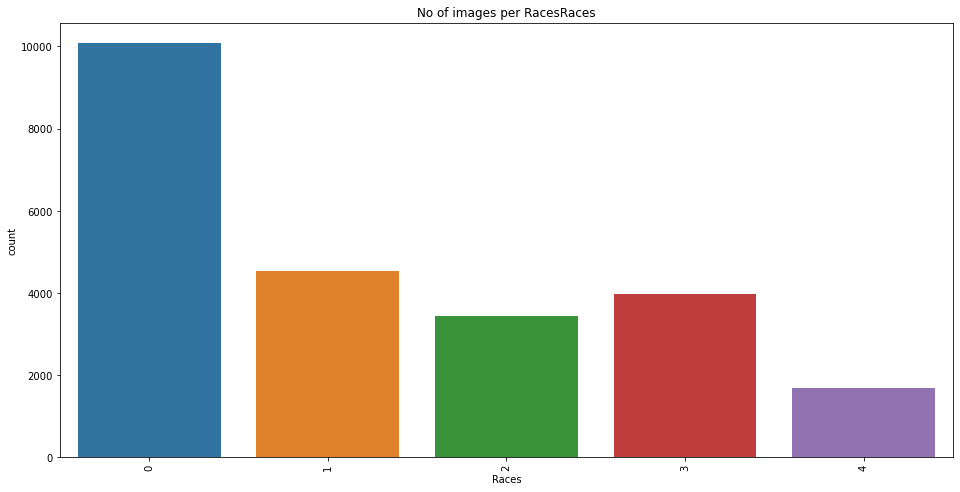

In [26]:
get_count1(df, 'Races')

From the bar chats above, the Whites, Blacks, Asians, Indians, and Other races are denoted by 0, 1, 2, 3 and 4 respectively.

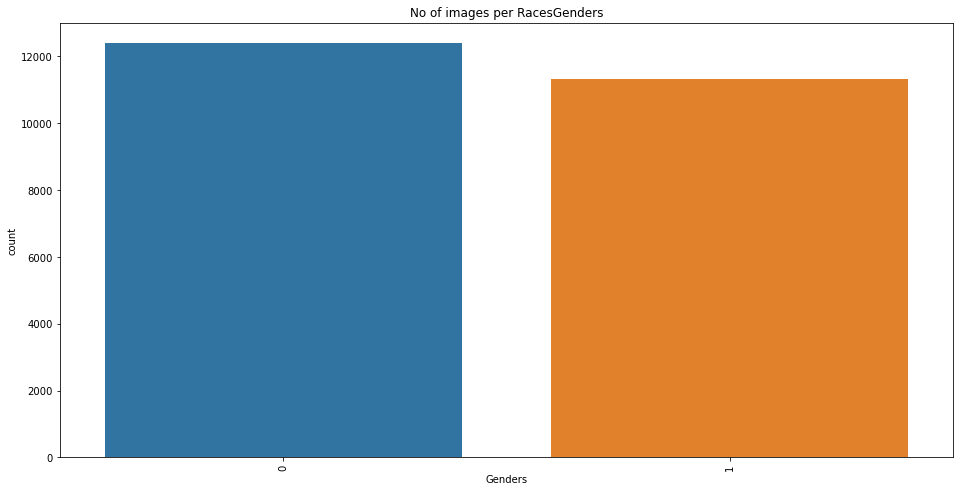

In [27]:
get_count1(df, 'Genders')

0 represents males while 1 represents females.

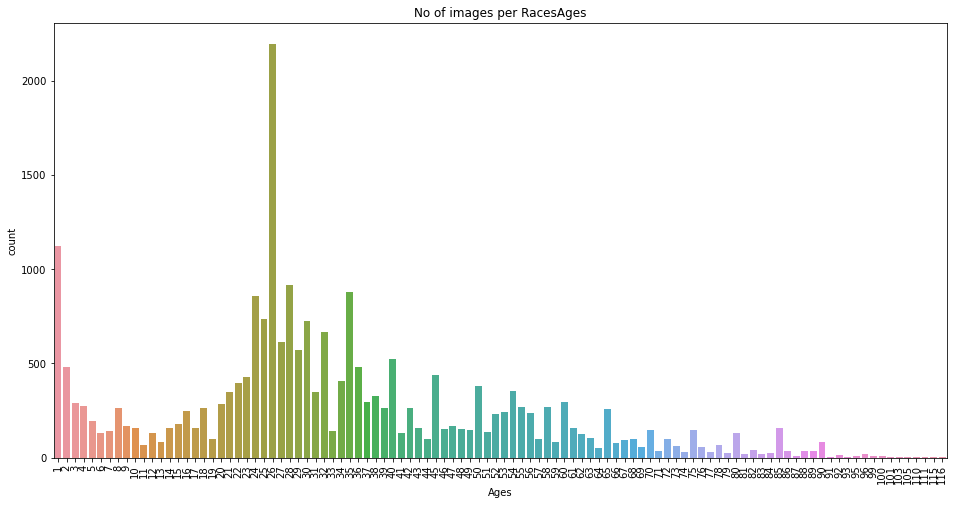

In [28]:
get_count1(df, 'Ages')

The bar charts above illustrate the discripancies in the age distributions. The majority of the images came from 26 year olds with a value count of 2197 followed by 1 year olds, 1123 images. Lesser images came from the old, above a hundred years. There was only a single image for both 103 and 111 years old. 

In [31]:
df['Ages'].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
91        2
101       2
103       1
111       1
Name: Ages, Length: 104, dtype: int64

## EVALUATION

## DEPLOYMENT